In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import fetch_openml
import warnings 
warnings.filterwarnings('ignore')
# Load the wine dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine_data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
wine_data.head()



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
# Split the dataset into features and target variable
X = wine_data.drop("Class", axis=1)  # Features
y = wine_data["Class"]  # Target variable

# Data preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

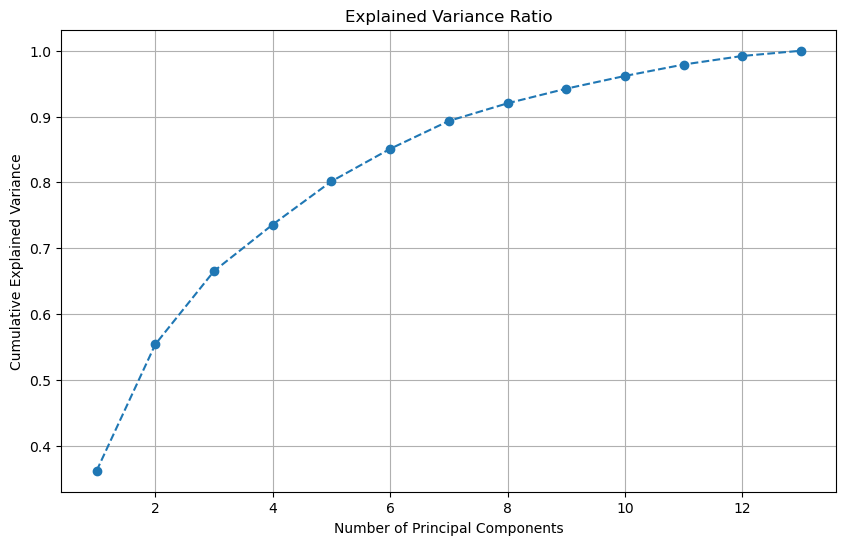

In [13]:
# Determine the optimal number of principal components to retain based on explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

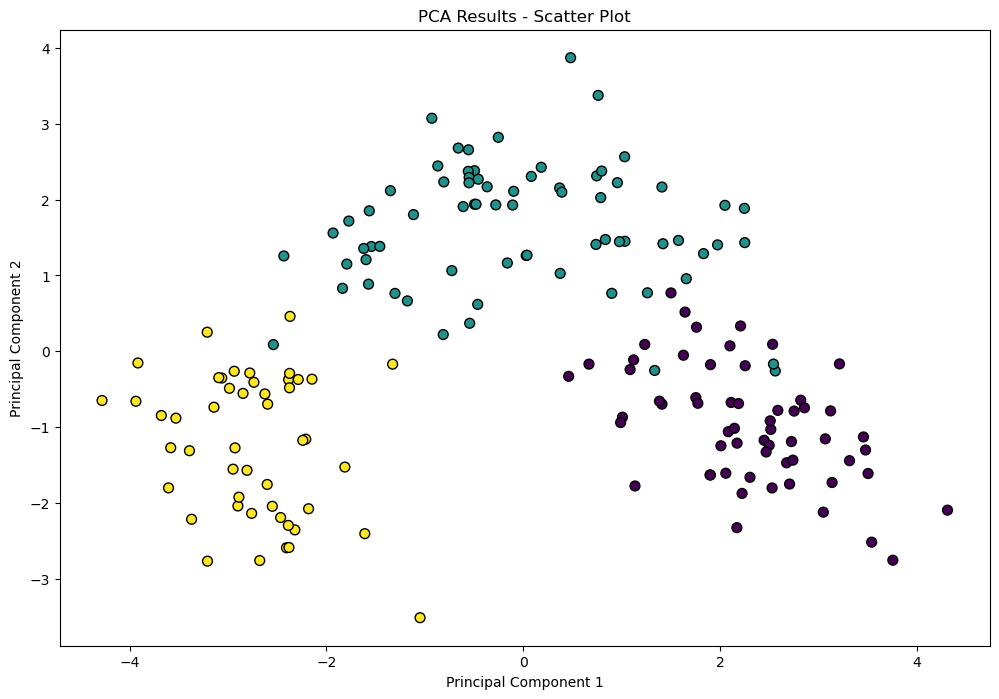

In [14]:
# Visualize the results of PCA using a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Results - Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [15]:
# Perform clustering on the PCA-transformed data using K-Means
kmeans = KMeans(n_clusters=3, random_state=40)
kmeans_labels = kmeans.fit_predict(X_pca)

In [16]:
# Performance metrics for the clustering algorithm
silhouette_score = metrics.silhouette_score(X_scaled, kmeans_labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(X_scaled, kmeans_labels)

# Print the performance metrics
print(f"Silhouette Score: {silhouette_score}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")


Silhouette Score: 0.2848589191898987
Calinski-Harabasz Score: 70.94000800315118


#interpretation and analysis

The plot of the cumulative explained variance ratio helps in determining the optimal number of principal components to retain.

You can observe the "elbow" point in the plot where adding more components does not significantly increase the explained variance. In this case, you may choose the number of components accordingly.


The scatter plot visually represents the data in the reduced-dimensional space after PCA.

Different colors represent different classes of wine. If there's a clear separation between classes, it indicates that the PCA transformation captured important features for class discrimination.

In the plot, clusters or patterns might emerge, helping you understand the intrinsic structure of the data.

Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

Calinski-Harabasz Score is a ratio of the between-cluster variance to within-cluster variance. A higher score indicates better-defined, well-separated clusters.